In [2]:
import networkx as nx
import matplotlib.pyplot as plt

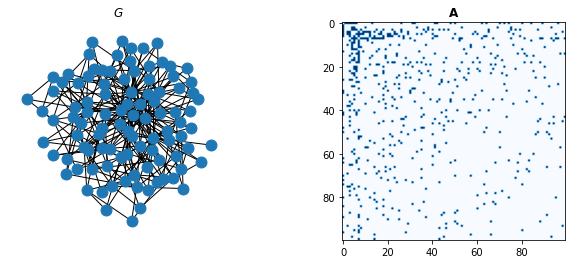

In [3]:
G = nx.barabasi_albert_graph(100, 3)
_, axes = plt.subplots(1, 2, figsize=(10, 4), gridspec_kw={'wspace': 0.5})
nx.draw_kamada_kawai(G, ax=axes[0], node_size=120)
axes[1].imshow(nx.to_numpy_matrix(G), aspect='auto', cmap='Blues')
axes[0].set_title("$G$")
axes[1].set_title("$\mathbf{A}$")
plt.show()

In [4]:
import torch

mat = torch.arange(12).view(3, 4)
mat

tensor([[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11]])

In [5]:
mat[0]

tensor([0, 1, 2, 3])

In [6]:
mat[:, -1]

tensor([ 3,  7, 11])

In [7]:
mat[:, ::2]

tensor([[ 0,  2],
        [ 4,  6],
        [ 8, 10]])

In [8]:
mat[:, ::2] = 42
mat

tensor([[42,  1, 42,  3],
        [42,  5, 42,  7],
        [42,  9, 42, 11]])

In [9]:
mat[1, ..., 2] = 5
mat

tensor([[42,  1, 42,  3],
        [42,  5,  5,  7],
        [42,  9, 42, 11]])

# Masked Selection

In [10]:
rnd = torch.rand(3, 9)
rnd

tensor([[0.3336, 0.9968, 0.6976, 0.2382, 0.9463, 0.0483, 0.6423, 0.3313, 0.6460],
        [0.1368, 0.4951, 0.6585, 0.6287, 0.0260, 0.5941, 0.1084, 0.7649, 0.4596],
        [0.6178, 0.4899, 0.3284, 0.7664, 0.4323, 0.8112, 0.1073, 0.0434, 0.3524]])

In [11]:
mask = rnd > 0.5
mask

tensor([[False,  True,  True, False,  True, False,  True, False,  True],
        [False, False,  True,  True, False,  True, False,  True, False],
        [ True, False, False,  True, False,  True, False, False, False]])

In [12]:
mask.type()

'torch.BoolTensor'

In [13]:
rnd[mask]

tensor([0.9968, 0.6976, 0.9463, 0.6423, 0.6460, 0.6585, 0.6287, 0.5941, 0.7649,
        0.6178, 0.7664, 0.8112])

# Note: Masking returns always a 1-D tensor!

In [14]:
rnd[:, (~mask).all(0)]

tensor([], size=(3, 0))

In [15]:
rnd[mask] = 0
rnd

tensor([[0.3336, 0.0000, 0.0000, 0.2382, 0.0000, 0.0483, 0.0000, 0.3313, 0.0000],
        [0.1368, 0.4951, 0.0000, 0.0000, 0.0260, 0.0000, 0.1084, 0.0000, 0.4596],
        [0.0000, 0.4899, 0.3284, 0.0000, 0.4323, 0.0000, 0.1073, 0.0434, 0.3524]])

# Index selection

In [16]:
A = torch.randint(2, (5, 5))
A

tensor([[1, 1, 1, 1, 0],
        [0, 0, 0, 0, 1],
        [0, 0, 0, 0, 0],
        [0, 1, 0, 1, 0],
        [0, 1, 0, 0, 0]])

In [17]:
idx = A.nonzero().T
idx

tensor([[0, 0, 0, 0, 1, 3, 3, 4],
        [0, 1, 2, 3, 4, 1, 3, 1]])

In [18]:
A[idx]

tensor([[[1, 1, 1, 1, 0],
         [1, 1, 1, 1, 0],
         [1, 1, 1, 1, 0],
         [1, 1, 1, 1, 0],
         [0, 0, 0, 0, 1],
         [0, 1, 0, 1, 0],
         [0, 1, 0, 1, 0],
         [0, 1, 0, 0, 0]],

        [[1, 1, 1, 1, 0],
         [0, 0, 0, 0, 1],
         [0, 0, 0, 0, 0],
         [0, 1, 0, 1, 0],
         [0, 1, 0, 0, 0],
         [0, 0, 0, 0, 1],
         [0, 1, 0, 1, 0],
         [0, 0, 0, 0, 1]]])

In [19]:
row, col = idx
A[row, col]

tensor([1, 1, 1, 1, 1, 1, 1, 1])

In [20]:
weight = torch.randint(10, (idx.size(1),))
weight

tensor([1, 8, 8, 8, 5, 4, 9, 6])

In [21]:
A[row, col] = weight
A

tensor([[1, 8, 8, 8, 0],
        [0, 0, 0, 0, 5],
        [0, 0, 0, 0, 0],
        [0, 4, 0, 9, 0],
        [0, 6, 0, 0, 0]])

In [22]:
w, perm = torch.sort(weight)
w, idx[:, perm]

(tensor([1, 4, 5, 6, 8, 8, 8, 9]),
 tensor([[0, 3, 1, 4, 0, 0, 0, 3],
         [0, 1, 4, 1, 1, 2, 3, 3]]))

# Gathering

In [23]:
rnd = torch.randint(10, (3, 9))
rnd

tensor([[3, 0, 6, 6, 3, 9, 5, 5, 2],
        [5, 4, 3, 5, 2, 7, 8, 1, 5],
        [3, 0, 2, 1, 9, 6, 3, 6, 2]])

In [24]:
sort, perm = torch.sort(rnd, dim=-1)
sort, perm

(tensor([[0, 2, 3, 3, 5, 5, 6, 6, 9],
         [1, 2, 3, 4, 5, 5, 5, 7, 8],
         [0, 1, 2, 2, 3, 3, 6, 6, 9]]),
 tensor([[1, 8, 0, 4, 6, 7, 2, 3, 5],
         [7, 4, 2, 1, 0, 3, 8, 5, 6],
         [1, 3, 2, 8, 0, 6, 5, 7, 4]]))

In [25]:
torch.gather(input=rnd, dim=-1, index=perm)

tensor([[0, 2, 3, 3, 5, 5, 6, 6, 9],
        [1, 2, 3, 4, 5, 5, 5, 7, 8],
        [0, 1, 2, 2, 3, 3, 6, 6, 9]])

# input and index must have the same shape, except along dim!

In [26]:
# Top-k elements of each row
k = 3
torch.gather(input=rnd, dim=-1, index=perm[:, :k])

tensor([[0, 2, 3],
        [1, 2, 3],
        [0, 1, 2]])

# Scattering

In [27]:
rnd, perm

(tensor([[3, 0, 6, 6, 3, 9, 5, 5, 2],
         [5, 4, 3, 5, 2, 7, 8, 1, 5],
         [3, 0, 2, 1, 9, 6, 3, 6, 2]]),
 tensor([[1, 8, 0, 4, 6, 7, 2, 3, 5],
         [7, 4, 2, 1, 0, 3, 8, 5, 6],
         [1, 3, 2, 8, 0, 6, 5, 7, 4]]))

In [28]:
# 替换用 src 的前 k 个替换 input 的前 k 个
torch.scatter(input=rnd, dim=-1, index=perm[:, :k], src=-torch.ones_like(rnd))

tensor([[-1, -1,  6,  6,  3,  9,  5,  5, -1],
        [ 5,  4, -1,  5, -1,  7,  8, -1,  5],
        [ 3, -1, -1, -1,  9,  6,  3,  6,  2]])

In [29]:
row, col

(tensor([0, 0, 0, 0, 1, 3, 3, 4]), tensor([0, 1, 2, 3, 4, 1, 3, 1]))

In [30]:
x = torch.arange(A.size(0))
x

tensor([0, 1, 2, 3, 4])

In [31]:
torch.scatter(input=x, dim=-1, index=col, src=row)

tensor([0, 4, 0, 3, 1])

In [32]:
# Use torch_scatter to perform aggregations
import torch_scatter

torch_scatter.scatter_min(src=row, index=col, dim=-1)

(tensor([0, 0, 0, 0, 1]), tensor([0, 1, 2, 3, 4]))

# Data Class

In [33]:
from torch_geometric.data import Data

edge_index = torch.tensor([[0, 1, 1, 2],
                           [1, 0, 2, 1]], dtype=torch.long)
x = torch.tensor([[-1], [0], [1]], dtype=torch.float)
data = Data(x=x, edge_index=edge_index)
data

Data(x=[3, 1], edge_index=[2, 4])

In [34]:
# load it from trimesh, networkx, scipy, etc.
# wget -nc https://raw.githubusercontent.com/mikedh/trimesh/master/models/bunny.ply

In [37]:
import trimesh

m = trimesh.load('bunny.ply')
m.show()

In [38]:
from torch_geometric import utils

data = utils.from_trimesh(m)
data

Data(pos=[8146, 3], face=[3, 16301])

In [39]:
from torch_geometric import transforms

f2e = transforms.FaceToEdge(remove_faces=False)
f2e(data)

Data(pos=[8146, 3], face=[3, 16301], edge_index=[2, 48726])

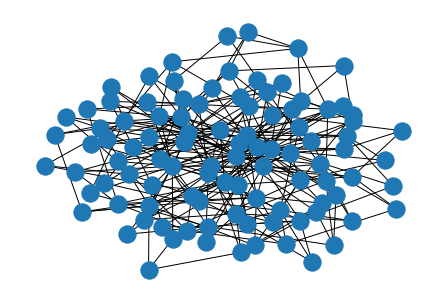

In [40]:
import networkx as nx

G = nx.barabasi_albert_graph(n=100, m=3)
nx.draw_kamada_kawai(G)

In [41]:
data = utils.from_networkx(G)
data

Data(edge_index=[2, 582], num_nodes=100)

In [43]:
s2d = transforms.ToDense(num_nodes=120)
s2d(data)

Data(num_nodes=100, adj=[120, 120], mask=[120])

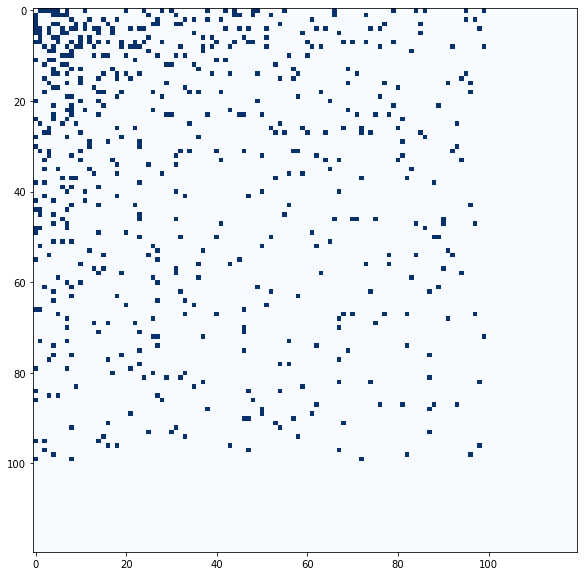

In [44]:
# show adjacency matrix
adj = data.adj.numpy()
_, ax = plt.subplots(figsize=(10, 10))
ax.imshow(adj, cmap='Blues')
plt.show()

# Ready-to-use Datasets
Lots of them:
• Graph tasks: TUDataset collection, Amazon, QM9, . . .
• Mesh tasks: FAUST and DynamicFaust human poses, ModelNet, SHRECs, . . .
• Point Clouds tasks: ShapeNet, S3DIS in-door scenes, PCPNetDataset, . . .

In [45]:
from torch_geometric.datasets import TUDataset, ModelNet, ShapeNet

ds = TUDataset(root='./data/', name='PROTEINS')
ds

Extracting data/PROTEINS/PROTEINS.zip
Processing...
Done!


PROTEINS(1113)

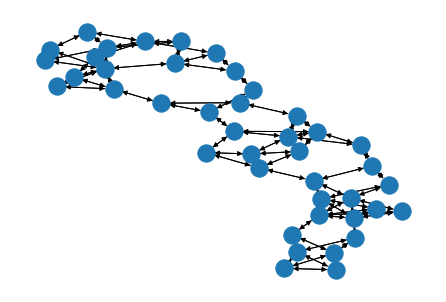

In [47]:
G = utils.to_networkx(ds[0])
nx.draw_kamada_kawai(G)

In [48]:
ds = ModelNet(root="./data/ModelNet/")
ds

KeyboardInterrupt: 

In [ ]:
m = utils.to_trimesh(ds[0])
m.show()

# DIY Dataset
You can create your own dataset by extending InMemoryDataset:
- Specify the data you need in raw_file_names()
- Specify the data you generate in processed_file_names()
- Implement download() and process()
- Load your (processed) data in `__init__()`

In [49]:
from torch_geometric.data import InMemoryDataset, download_url
from rdkit import Chem
import pandas as pd
import os

proxy = 'http://127.0.0.1:10809'
os.environ['https_proxy'] = proxy
os.environ['http_proxy'] = proxy

In [51]:
class COVID(InMemoryDataset):
    url = 'https://github.com/yangkevin2/coronavirus_data/raw/master/data/mpro_xchem.csv'

    def __init__(self, root, transform=None, pre_transform=None, pre_filter=None):
        super(COVID, self).__init__(root, transform, pre_transform, pre_filter)
        # Load processed data
        self.data, self.slices = torch.load(self.processed_paths[0])

    @property
    def raw_file_names(self):
        return ['mpro_xchem.csv']

    @property
    def processed_file_names(self):
        return ['data.pt']

    def download(self):
        download_url(self.url, self.raw_dir)

    def process(self):
        df = pd.read_csv(self.raw_paths[0])
        data_list = []
        for smiles, label in df.itertuples(False, None):
            mol = Chem.MolFromSmiles(smiles)  # Read the molecule info
            adj = Chem.GetAdjacencyMatrix(mol)  # Get molecule structure
            # You should extract other features here!
            data = Data(num_nodes=adj.shape[0],
                        edge_index=torch.Tensor(adj).nonzero().T,
                        y=label)
            data_list.append(data)
        self.data, self.slices = self.collate(data_list)
        torch.save((self.data, self.slices), self.processed_paths[0])

In [52]:
covid = COVID(root='./data/COVID/')
covid

Processing...
Done!


COVID(880)

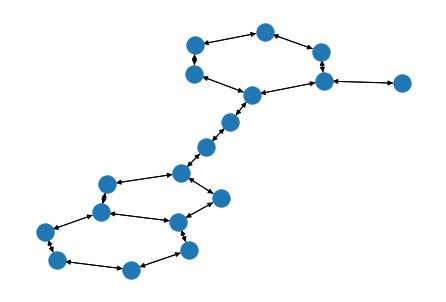

In [53]:
G = utils.to_networkx(covid[0])
nx.draw_kamada_kawai(G)

# Mini-Batches

In [54]:
from torch_geometric.data import Batch

b = Batch.from_data_list(covid[:10])
b

DataBatch(edge_index=[2, 352], y=[10], num_nodes=166, batch=[166], ptr=[11])

In [55]:
b.batch

tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3,
        3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
        4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
        5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 7, 7, 7,
        7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 8, 8, 8, 8, 8, 8, 8, 8, 8,
        8, 8, 8, 8, 8, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9])

In [56]:
b.edge_index[0]

tensor([  0,   1,   1,   1,   2,   2,   3,   3,   4,   4,   5,   5,   6,   6,
          6,   7,   7,   8,   8,   9,   9,   9,  10,  10,  11,  11,  11,  12,
         12,  13,  13,  14,  14,  15,  15,  16,  16,  16,  17,  17,  18,  19,
         19,  19,  20,  21,  21,  22,  22,  23,  23,  24,  24,  24,  25,  25,
         26,  26,  27,  27,  27,  28,  28,  29,  29,  30,  30,  30,  31,  32,
         32,  33,  33,  33,  34,  35,  35,  35,  36,  36,  36,  37,  37,  37,
         38,  38,  38,  39,  39,  40,  40,  41,  41,  42,  42,  43,  43,  44,
         44,  45,  45,  46,  47,  48,  48,  48,  49,  49,  50,  50,  51,  51,
         52,  52,  52,  53,  53,  54,  54,  55,  55,  55,  56,  56,  57,  57,
         57,  58,  58,  58,  58,  59,  60,  61,  62,  63,  63,  63,  64,  65,
         65,  66,  66,  66,  67,  67,  68,  68,  69,  69,  69,  70,  70,  71,
         71,  71,  72,  72,  73,  73,  74,  74,  75,  75,  76,  76,  77,  77,
         78,  78,  79,  80,  80,  80,  81,  82,  82,  82,  83,  

In [57]:
covid[9].edge_index[0]

tensor([ 0,  1,  1,  2,  2,  2,  3,  4,  4,  4,  5,  5,  6,  6,  7,  7,  7,  8,
         8,  9,  9,  9, 10, 10, 11, 11, 12, 12, 12, 13, 14, 14, 15, 15, 16, 16])

In [58]:
# MessagePassing Class
from torch_geometric.nn import MessagePassing


class ConnectedComponents(MessagePassing):
    def __init__(self):

        super(ConnectedComponents, self).__init__(aggr="max")

    def forward(self, data):
        x = torch.arange(data.num_nodes).view(-1, 1)
        last_x = torch.zeros_like(x)
        while not x.equal(last_x):
            last_x = x.clone()
            x = self.propagate(data.edge_index, x=x)
            x = torch.max(x, last_x)
        unique, perm = torch.unique(x, return_inverse=True)
        perm = perm.view(-1)
        if "batch" not in data:
            return unique.size(0), perm
        cc_batch = unique.scatter(dim=-1, index=perm, src=data.batch)
        return cc_batch.bincount(minlength=data.num_graphs), perm

    def message(self, x_j):
        return x_j

    def update(self, aggr_out):
        return aggr_out

In [60]:
ds = TUDataset(root='./data/', name='PROTEINS')
data = Batch.from_data_list(ds[:10])

cc = ConnectedComponents()
count, perm = cc(data)
count

tensor([1, 1, 1, 1, 1, 8, 4, 1, 1, 1])

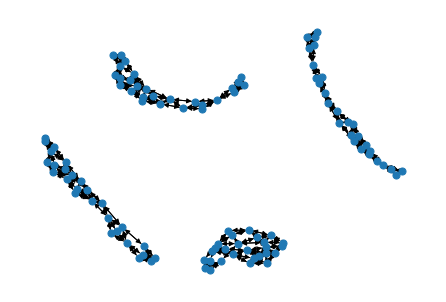

In [61]:
G = utils.to_networkx(ds[6])
nx.draw(G, node_size=50)

# Learning with PyG

In [84]:
from torch_geometric.nn import GCNConv, JumpingKnowledge, global_add_pool
from torch.nn import functional as F


class SimpleGNN(torch.nn.Module):
    def __init__(self, dataset, hidden=64, layers=6):
        super(SimpleGNN, self).__init__()
        self.dataset = dataset
        self.convs = torch.nn.ModuleList()
        self.convs.append(GCNConv(in_channels=dataset.num_node_features,
                                  out_channels=hidden))
        for _ in range(1, layers):
            self.convs.append(GCNConv(in_channels=hidden,
                                      out_channels=hidden))
        self.jk = JumpingKnowledge(mode="cat")
        self.jk_lin = torch.nn.Linear(in_features=hidden * layers,
                                      out_features=hidden)
        self.lin_1 = torch.nn.Linear(in_features=hidden,
                                     out_features=hidden)
        self.lin_2 = torch.nn.Linear(in_features=hidden,
                                     out_features=dataset.num_classes)

    def forward(self, index):
        data = Batch.from_data_list(self.dataset[index])
        x = data.x
        xs = []

        for conv in self.convs:
            x = F.relu(conv(x=x, edge_index=data.edge_index))
            xs.append(x)

        x = self.jk(xs)
        x = F.relu(self.jk_lin(x))
        x = global_add_pool(x, batch=data.batch)
        x = F.relu(self.lin_1(x))
        x = F.softmax(self.lin_2(x), dim=-1)

        return x

In [85]:
ohd = transforms.OneHotDegree(max_degree=4)
covid = COVID(root='./data/COVID/', transform=ohd)
covid[0]

Data(edge_index=[2, 40], y=[1], num_nodes=18, x=[18, 5])

In [86]:
len(covid)

880

In [87]:
from skorch import NeuralNetClassifier

X, y = torch.arange(len(covid)).long(), covid.data.y
net = NeuralNetClassifier(
    module=SimpleGNN,
    module__dataset=covid,
    max_epochs=20,
    batch_size=-1,
    lr=0.001
)

In [88]:
fit = net.fit(X, y)

  epoch    train_loss    valid_acc    valid_loss     dur
-------  ------------  -----------  ------------  ------
      1        0.6551       0.9091        0.6585  0.2234
      2        0.6510       0.9091        0.6553  0.1808
      3        0.6470       0.9091        0.6522  0.1739
      4        0.6430       0.9091        0.6491  0.1723
      5        0.6392       0.9091        0.6461  0.1666
      6        0.6353       0.9091        0.6431  0.1778
      7        0.6316       0.9091        0.6402  0.1755
      8        0.6279       0.9091        0.6373  0.1698
      9        0.6242       0.9091        0.6344  0.1752
     10        0.6206       0.9091        0.6316  0.1669
     11        0.6171       0.9091        0.6288  0.1723
     12        0.6136       0.9091        0.6261  0.1682
     13        0.6101       0.9091        0.6234  0.1716
     14        0.6067       0.9091        0.6207  0.1703
     15        0.6033       0.9091        0.6180  0.1688
     16        0.5999       0.9